# Lab 3

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

## Analisis Exploratorio

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

c:\users\abril's pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

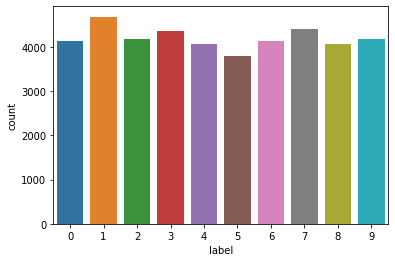

In [5]:
sns.countplot(train['label'],data = train)

## Red neuronal

In [2]:
(d_train, d_test), d_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [5]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

d_train = d_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_train = d_train.cache()
d_train = d_train.shuffle(d_info.splits['train'].num_examples)
d_train = d_train.batch(128)
d_train = d_train.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
d_test = d_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_test = d_test.batch(128)
d_test = d_test.cache()
d_test = d_test.prefetch(tf.data.experimental.AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    d_train,
    epochs=6,
    validation_data=d_test,
)

Epoch 1/6
469/469 [==============================] - 7s 4ms/step - loss: 1.7993 - sparse_categorical_accuracy: 0.5813 - val_loss: 35.0359 - val_sparse_categorical_accuracy: 0.6500
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.8861 - sparse_categorical_accuracy: 0.8051 - val_loss: 40.1506 - val_sparse_categorical_accuracy: 0.7474
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.5933 - sparse_categorical_accuracy: 0.8561 - val_loss: 50.4161 - val_sparse_categorical_accuracy: 0.7509
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.4738 - sparse_categorical_accuracy: 0.8787 - val_loss: 56.0454 - val_sparse_categorical_accuracy: 0.7564
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8903 - val_loss: 59.7453 - val_sparse_categorical_accuracy: 0.7636
Epoch 6/6
469/469 [==============================] - 2s 3ms/step - loss: 0.3761 - sparse_categorical

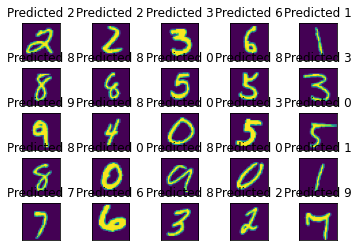

In [11]:
for (index, (img, label)) in enumerate(d_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

Se puede ver que el modelo de red neuronal no es tan preciso con las predicciones de los numeros, ya que como se ve en la figura anterior, en algunos casos predijo un numero incorrecto. La presicion que se obtuvo fue de un 77%.

## Deep Learning

In [12]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# TFDS da las imágenes como tf.uint8, pero que el modelo espera tf.float32.
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
print(ds_train)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


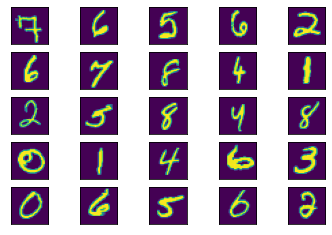

In [14]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(list(ds_train)[0][0][i].reshape(28,28))
plt.show()

In [15]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28,(1,1), activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5488)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               702592    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 703,938
Trainable params: 703,938
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

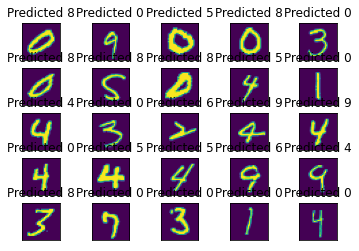

In [19]:
for (index, (img, label)) in enumerate(ds_train):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

In [20]:
history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 13s 27ms/step - loss: 0.3759 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.2281 - val_sparse_categorical_accuracy: 0.9289
Epoch 2/6
469/469 [==============================] - 13s 27ms/step - loss: 0.1988 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.1645 - val_sparse_categorical_accuracy: 0.9504
Epoch 3/6
469/469 [==============================] - 14s 30ms/step - loss: 0.1457 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.1290 - val_sparse_categorical_accuracy: 0.9610
Epoch 4/6
469/469 [==============================] - 15s 31ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.1234 - val_sparse_categorical_accuracy: 0.9640
Epoch 5/6
469/469 [==============================] - 15s 32ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9655
Epoch 6/6
469/469 [==============================] - 18s 37ms/step - loss: 0.0825 - sparse_cate

In [21]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


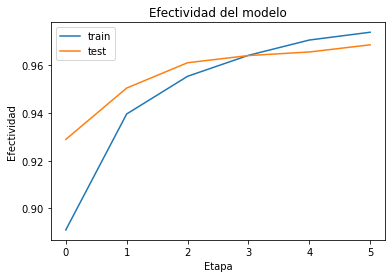

In [22]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Efectividad del modelo')
plt.ylabel('Efectividad')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



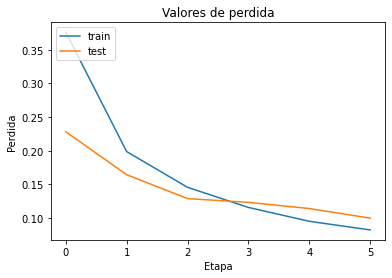

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Valores de perdida')
plt.ylabel('Perdida')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

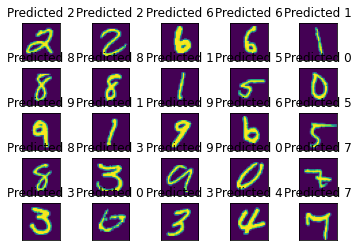

In [24]:
for (index, (img, label)) in enumerate(ds_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

El modelo de red neuronal con deep learinng tuvo muy buena presicion logro predecir bien los numeros como se puede ver y su presicion fue de 96%.

## KNN

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [7]:
test.shape

(28000, 784)

In [8]:
train.shape

(42000, 785)

In [9]:
x = train.drop('label',axis = 1).to_numpy()
y = train['label'].to_numpy()

In [10]:
x = x/255

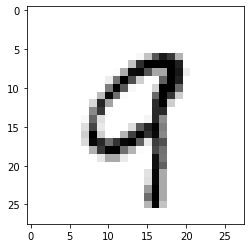

In [11]:
plt.imshow(x[41999].reshape(28,28),cmap = matplotlib.cm.binary)
plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [13]:
x_train.shape ,x_test.shape 

((29400, 784), (12600, 784))

In [14]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    prediction = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, prediction))

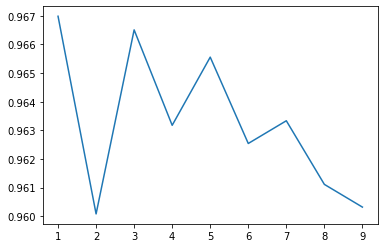

In [15]:
plt.plot(range(1,10),accuracy)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)
metrics.accuracy_score(y_test,predictions)

0.9665079365079365

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.95      1.00      0.97      1389
           2       0.98      0.95      0.97      1294
           3       0.96      0.96      0.96      1355
           4       0.98      0.97      0.97      1222
           5       0.96      0.96      0.96      1085
           6       0.98      0.98      0.98      1256
           7       0.96      0.97      0.96      1359
           8       0.98      0.93      0.96      1209
           9       0.95      0.95      0.95      1231

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [18]:
test = test/255

predictions = knn.predict(test)

In [19]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [20]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

Prediccion: 2


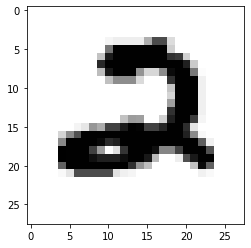

Prediccion: 0


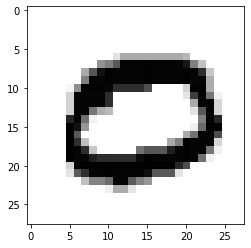

Prediccion: 9


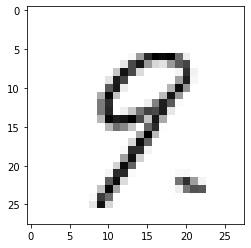

Prediccion: 9


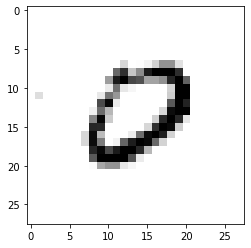

Prediccion: 3


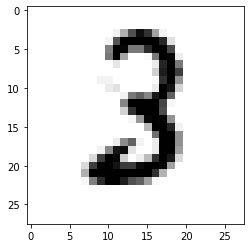

Prediccion: 7


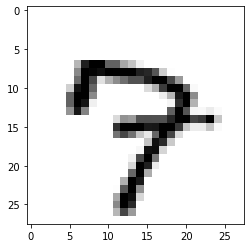

Prediccion: 0


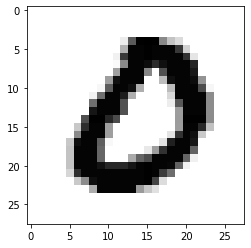

Prediccion: 3


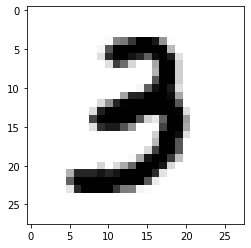

Prediccion: 0


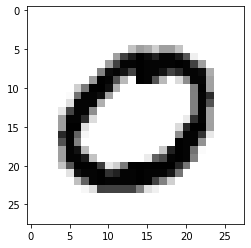

Prediccion: 3


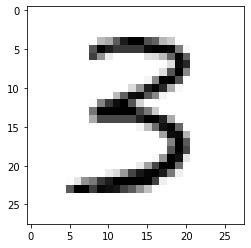

Prediccion: 5


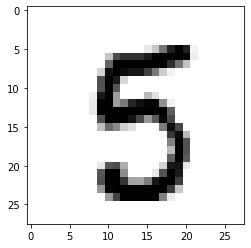

In [22]:
for i in range(0,11):
    print('Prediccion:', predictions[i])
    plt.imshow(x[i].reshape(28,28),cmap = matplotlib.cm.binary)
    plt.show()

Se eligio KNN porque pensamos que es el modelo que tendria mejores resultados para predecir y como se puede ver asi fue ya que tuvo una presicion del 96%, y en las predicciones mostradas acerto en todas.

## Comparacion

Si se comparan las predicciones que se hicieron por todos los algoritmos, se puede ver fácilmente que la red neuronal simple, fue el pero modelo de todos, ya que falló en varias predicciones, mientras que los otros dos no fallaron. Si comparamos 